In [1]:
### Packages necessary for model construction 

import tensorflow as tf
import tensorflow.keras.callbacks
import datetime 

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os 

from matplotlib import pyplot as plt

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.utils import compute_class_weight

import graphviz
import pydot

In [2]:
#Read the Data

UN_Data = pd.read_csv('GA_Query_CleanLIWC') 

UN_Data

,Unnamed: 0,date,Class M,Class S,Class I,Class P,Class B,Policy Passed,Conflict Indicator,WC,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,0,2012,1,0,0,0,0,0,1,20075.0,...,4.34,0.03,0.04,0.00,0.0,1.23,0.07,0.64,0.82,0.60
1,1,2012,0,0,3,0,0,0,0,822.0,...,3.04,1.70,0.00,0.00,0.0,0.85,0.49,0.12,4.38,1.46
2,2,2003,0,0,0,0,0,0,0,314.0,...,3.50,0.96,0.00,0.00,0.0,2.23,0.00,0.64,3.18,2.87
3,3,1995,0,0,0,0,0,1,1,17021.0,...,4.91,0.25,0.17,0.02,0.0,1.33,0.22,0.16,0.64,2.18
4,4,2007,0,0,0,0,0,0,0,9289.0,...,3.80,0.16,0.15,0.00,0.0,0.93,0.28,0.75,1.42,1.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10207,10207,2004,0,0,0,0,0,0,0,4059.0,...,3.72,0.15,0.12,0.00,0.0,1.18,0.00,0.76,1.72,1.23
10208,10208,1994,0,0,0,0,0,0,0,8210.0,...,3.58,0.12,0.22,0.00,0.0,1.06,0.02,0.29,1.05,1.75
10209,10209,2013,0,0,0,0,0,0,0,583.0,...,3.09,0.86,0.00,0.69,0.0,1.89,0.34,0.00,4.80,4.63
10210,10210,2009,0,0,0,0,0,0,0,1562.0,...,2.82,0.19,0.45,0.00,0.0,1.34,0.00,0.77,1.66,2.18


In [3]:
#Inspect and Clean the Data

UN_Data.head(5)

UN_Data.drop(['Unnamed: 0'], axis = 1, inplace= True)

UN_Data

,date,Class M,Class S,Class I,Class P,Class B,Policy Passed,Conflict Indicator,WC,Analytic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,2012,1,0,0,0,0,0,1,20075.0,99.00,...,4.34,0.03,0.04,0.00,0.0,1.23,0.07,0.64,0.82,0.60
1,2012,0,0,3,0,0,0,0,822.0,99.00,...,3.04,1.70,0.00,0.00,0.0,0.85,0.49,0.12,4.38,1.46
2,2003,0,0,0,0,0,0,0,314.0,99.00,...,3.50,0.96,0.00,0.00,0.0,2.23,0.00,0.64,3.18,2.87
3,1995,0,0,0,0,0,1,1,17021.0,98.45,...,4.91,0.25,0.17,0.02,0.0,1.33,0.22,0.16,0.64,2.18
4,2007,0,0,0,0,0,0,0,9289.0,98.94,...,3.80,0.16,0.15,0.00,0.0,0.93,0.28,0.75,1.42,1.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10207,2004,0,0,0,0,0,0,0,4059.0,98.95,...,3.72,0.15,0.12,0.00,0.0,1.18,0.00,0.76,1.72,1.23
10208,1994,0,0,0,0,0,0,0,8210.0,99.00,...,3.58,0.12,0.22,0.00,0.0,1.06,0.02,0.29,1.05,1.75
10209,2013,0,0,0,0,0,0,0,583.0,99.00,...,3.09,0.86,0.00,0.69,0.0,1.89,0.34,0.00,4.80,4.63
10210,2009,0,0,0,0,0,0,0,1562.0,98.88,...,2.82,0.19,0.45,0.00,0.0,1.34,0.00,0.77,1.66,2.18


In [4]:
#Inspect the data by key descriptive statistics

UN_Data.describe()

,date,Class M,Class S,Class I,Class P,Class B,Policy Passed,Conflict Indicator,WC,Analytic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
count,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.00000,10212.000000,10190.000000,10190.000000,...,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000
mean,2005.852135,0.032805,0.009205,0.168625,0.051900,0.021641,0.13964,0.457697,9442.204220,98.190282,...,5.193233,0.303105,0.144628,0.031364,0.014043,1.154469,0.260464,0.397916,1.744508,1.768528
std,7.542111,0.229542,0.099521,0.861341,0.307019,0.156540,0.34663,0.498232,7786.325195,1.085791,...,3.290078,0.466117,0.190811,0.105541,0.713727,0.643019,0.439789,1.273977,1.466890,4.337472
min,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,44.000000,80.460000,...,0.210000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.130000,0.010000
25%,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3838.500000,97.880000,...,3.980000,0.090000,0.060000,0.000000,0.000000,0.800000,0.050000,0.230000,0.860000,0.740000
50%,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,7439.500000,98.440000,...,4.440000,0.160000,0.110000,0.000000,0.000000,1.040000,0.130000,0.340000,1.330000,1.170000
75%,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,12438.750000,99.000000,...,4.990000,0.320000,0.190000,0.020000,0.000000,1.380000,0.300000,0.490000,2.090000,2.070000
max,2020.000000,9.000000,2.000000,28.000000,9.000000,3.000000,1.00000,1.000000,74776.000000,99.000000,...,47.760000,22.710000,11.150000,3.400000,49.920000,22.880000,14.030000,89.620000,17.900000,213.040000


In [5]:
#Group the data by our label (dependent variable) of policy passage

UN_Data.groupby(['Policy Passed']).count()

,date,Class M,Class S,Class I,Class P,Class B,Conflict Indicator,WC,Analytic,Clout,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
Policy Passed,,,,,,,,,,,,,,,,,,,,,
0,8786,8786,8786,8786,8786,8786,8786,8764,8764,8764,...,8764,8764,8764,8764,8764,8764,8764,8764,8764,8764
1,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426,...,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426


In [6]:
#Normalize the data 

UN_Data1 = tf.keras.utils.normalize(UN_Data.drop(columns = ['Policy Passed']))

UN_Data1["Policy Passed"] = UN_Data['Policy Passed']

UN_Data1.describe()

,date,Class M,Class S,Class I,Class P,Class B,Conflict Indicator,WC,Analytic,Clout,...,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,Policy Passed
count,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,...,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,10190.000000,1.019000e+04,10212.00000
mean,0.345714,0.000004,0.000001,0.000021,0.000007,0.000002,0.000056,0.881989,0.016961,0.011428,...,0.000081,0.000027,0.000006,0.000003,0.000222,0.000051,0.000066,0.000417,4.345803e-04,0.13964
std,0.252698,0.000030,0.000017,0.000110,0.000050,0.000021,0.000086,0.193529,0.012448,0.008500,...,0.000179,0.000070,0.000029,0.000154,0.000308,0.000150,0.000281,0.000665,1.748792e-03,0.34663
min,0.026924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021901,0.001303,0.001053,...,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000003,4.473887e-07,0.00000
25%,0.159519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.885374,0.007792,0.005150,...,0.000008,0.000004,0.000000,0.000000,0.000069,0.000004,0.000020,0.000073,6.634241e-05,0.00000
50%,0.260213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.965297,0.012765,0.008537,...,0.000020,0.000012,0.000000,0.000000,0.000129,0.000013,0.000040,0.000180,1.553934e-04,0.00000
75%,0.463364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000094,0.987100,0.022704,0.015068,...,0.000066,0.000029,0.000001,0.000000,0.000252,0.000041,0.000077,0.000431,3.987904e-04,0.00000
max,0.997075,0.001033,0.000412,0.002388,0.001449,0.000514,0.000492,0.999635,0.049344,0.040877,...,0.005398,0.004388,0.001033,0.010615,0.010232,0.006303,0.019591,0.008041,9.570280e-02,1.00000


In [7]:
#Divide our variables between the independent variables (features) and dependent variables (policy passage)

labels = UN_Data1 ['Policy Passed']
features = UN_Data1.drop(columns = ['Policy Passed'])

In [8]:
#Inspect shape of features

features = pd.get_dummies(features)
features.shape[0:100]

(10212, 100)

In [9]:
#Define type of feature and label values

features = features.values.astype('float32')
labels = labels.values.astype('float32')

In [10]:
#Data Sets for Training

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train, labels_train, test_size=0.2)

In [11]:
#Define Precision, Recall, and F1 score metrics
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras

In [12]:
#Create your model

model = tf.keras.Sequential([keras.layers.Dense(1024, input_shape=(100,)),
                          keras.layers.Dense(512, activation= 'relu'),
                         keras.layers.Dense(1, activation = 'sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              103424    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 628,737
Trainable params: 628,737
Non-trainable params: 0
_________________________________________________________________


In [13]:
### Inspect form of model

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes = True, show_dtype=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [14]:
#Set checkpoints, metrics, loss, and optimizer functions for the model
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)

model.compile(optimizer= 'adam',
             loss= tf.keras.losses.binary_crossentropy,
             metrics=['acc', precision, recall, f1_metric])

In [15]:
#Run the model

history = model.fit(features_train, labels_train, epochs=15, validation_data=(features_validation, labels_validation))

Epoch 1/15
205/205 [==============================] - 2s 6ms/step - loss: nan - acc: 0.8558 - precision: nan - recall: nan - f1_metric: nan - val_loss: nan - val_acc: 0.8641 - val_precision: nan - val_recall: nan - val_f1_metric: nan
Epoch 2/15
205/205 [==============================] - 1s 4ms/step - loss: nan - acc: 0.8537 - precision: nan - recall: nan - f1_metric: nan - val_loss: nan - val_acc: 0.8641 - val_precision: nan - val_recall: nan - val_f1_metric: nan
Epoch 3/15
205/205 [==============================] - 1s 3ms/step - loss: nan - acc: 0.8584 - precision: nan - recall: nan - f1_metric: nan - val_loss: nan - val_acc: 0.8641 - val_precision: nan - val_recall: nan - val_f1_metric: nan
Epoch 4/15
205/205 [==============================] - 1s 3ms/step - loss: nan - acc: 0.8617 - precision: nan - recall: nan - f1_metric: nan - val_loss: nan - val_acc: 0.8641 - val_precision: nan - val_recall: nan - val_f1_metric: nan
Epoch 5/15
205/205 [==============================] - 1s 4ms/ste

In [16]:
#Run model predictions

prediction_features = model.predict(features_test)
performance = model.evaluate(features_test, labels_test)
print(performance)

64/64 [==============================] - 0s 1ms/step - loss: nan - acc: 0.8664 - precision: nan - recall: nan - f1_metric: nan
[nan, 0.8663730025291443, nan, nan, nan]


In [17]:
#Define history objects

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'precision', 'recall', 'f1_metric', 'val_loss', 'val_acc', 'val_precision', 'val_recall', 'val_f1_metric'])

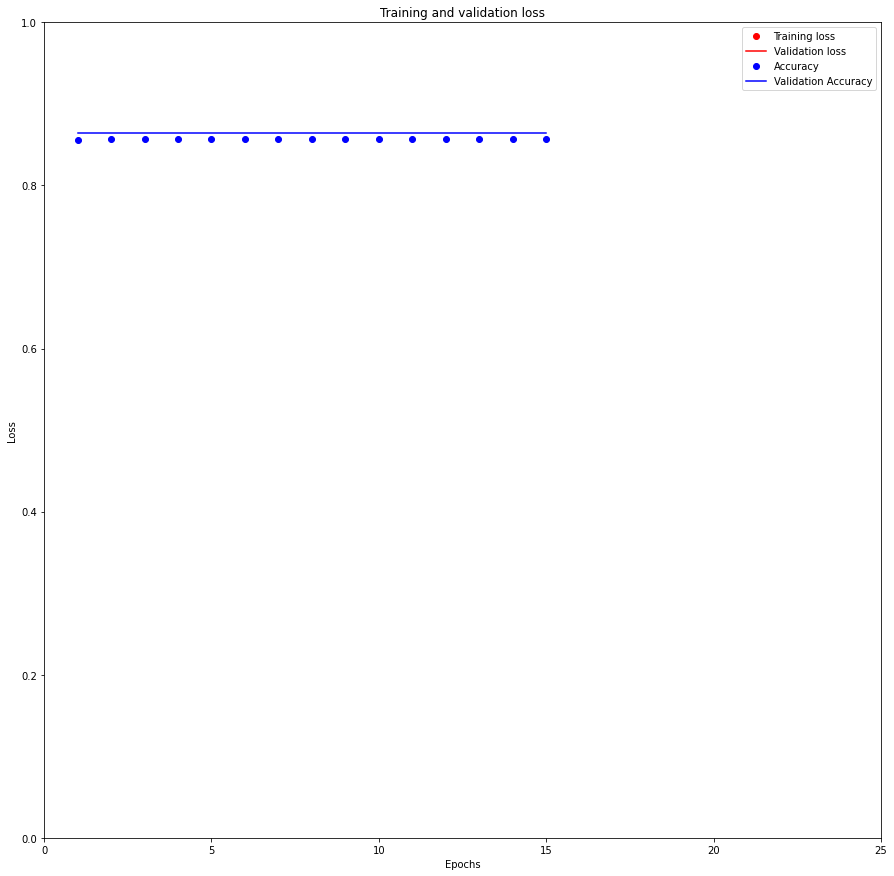

In [18]:
# Retrieve Metrics to check Overfit 
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

###########

precision = history_dict['precision']
recall = history_dict['recall']
fl_metric = history_dict['f1_metric']
val_precision = history_dict['val_precision']
val_recall = history_dict['val_recall']
val_f1_metric = history_dict['val_f1_metric']

epochs = range(1, len(acc) + 1)

### Metrics for loss and accuracy

plt.figure(1, figsize=(15,15))
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'ro', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.plot(epochs, acc, 'bo', label='Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

axes = plt.gca()
axes.set_xlim([0,25]) # controls x axis length
axes.set_ylim([0, 1]) # controls y axis height 

plt.show()

(0.0, 2.0)

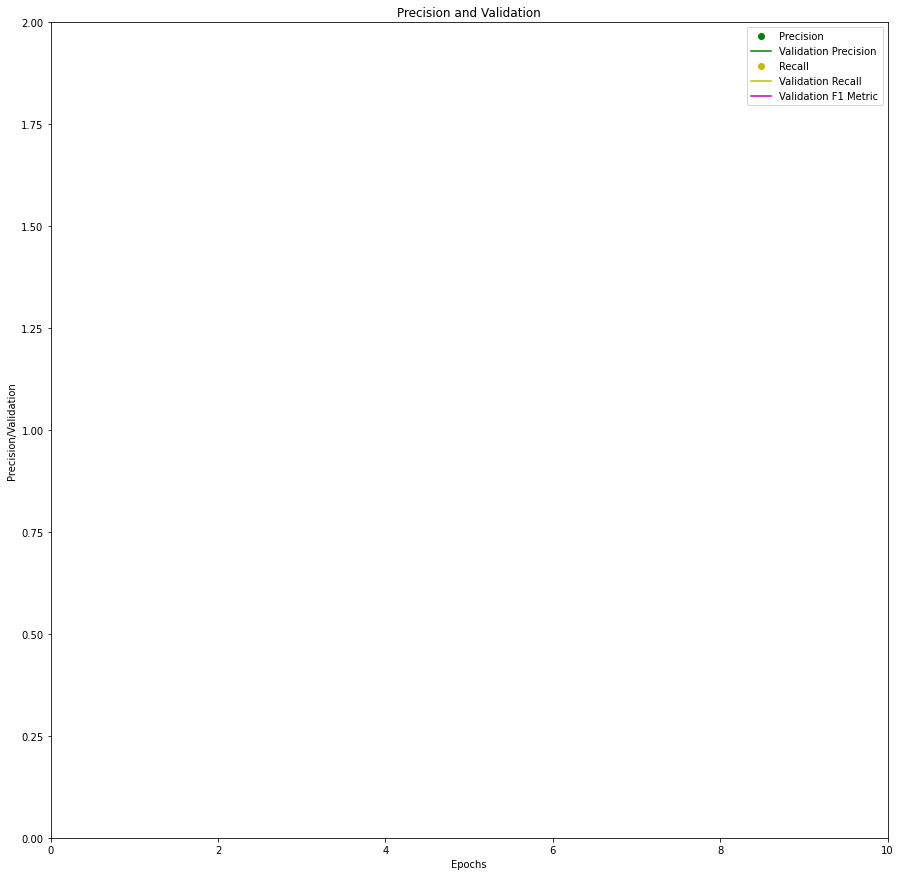

In [19]:
### Metrics for Precision, Recall, and F1 score

plt.figure(1, figsize=(15,15))

plt.plot(epochs, precision, 'go', label='Precision')
plt.plot(epochs, val_precision, 'g', label='Validation Precision')

plt.plot(epochs, recall, 'yo', label='Recall')
plt.plot(epochs, val_recall, 'y', label='Validation Recall')

# REMOVED f1_metric as it didnt fit 
plt.plot(epochs, val_f1_metric, 'm', label='Validation F1 Metric')
# plt.plot(epochs, f1_metric, 'm', label='Validation F1 Metric')


plt.title('Precision and Validation')
plt.xlabel('Epochs')
plt.ylabel('Precision/Validation')
plt.legend()

axes = plt.gca()
axes.set_xlim([0,10]) # controls x axis length
axes.set_ylim([0, 2]) # controls y axis height 

In [20]:
#Tensorflow Graphics

%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
checkpoint_path = 'training_1/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)



In [ ]:
# Save model weights
model.save_weights('saved_model/')

In [ ]:
# Save model 
model.save('complete_saved_model/')

In [ ]:
model = keras.models.load_model('complete_saved_model/', custom_objects={'f1_metric':f1_metric, 'recall': recall, 'precision':precision})

In [ ]:
   # Load model
model.load_weights('saved_model/')

In [ ]:
#If you are using google collab and want to download the corresponding model. 

#from google.colab import files
#files.download('complete_saved_model') 

#from google.colab import files
#files.download('logs')

#from google.colab import files
#files.download('sample_data') 

#from google.colab import files
#files.download('saved_model') 